In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
import random

random.seed(10)

In [39]:
input_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/data"

In [40]:
#df = pd.read_csv(os.path.join(input_dir,r"welfare_data_with_exante_ratings_ch3.csv"))
df = pd.read_csv(os.path.join(input_dir,r"welfare_data_with_exante_ratings_update.csv"))

In [41]:
df = df[df["year"]==2016].reset_index()

In [42]:
df["shareid"].nunique()

490

In [43]:
#Specify exante_rating

#df["exante_rating"] = df["exante_rating_baseline"]
#df["exante_rating"] = df["exante_rating_random"]
#df["exante_rating"] = df["exante_rating_obs"]
df["exante_rating"] = df["exante_rating_const"]

#df["exante_rating"] = df["exante_rating_obs_less"]
#df["exante_rating"] = df["exante_rating_op"]
#df["exante_rating"] = df["exante_rating_op_chain"]
#df["exante_rating"] = df["exante_rating_op_chain_national"]

In [44]:
#supply_max = df.groupby(["shareid","year"])["Supply"].max().reset_index().rename(columns={"Supply":"max_supply_year"})
#df = df.merge(supply_max, on=["shareid","year"], how="left")
#df["capacity"] = df["max_supply_year"]/30

In [45]:
# Calculate counterfactual market share

#alpha = -0.014519850512492974
#sigma = 0.5141

alpha = -0.012
sigma = 0.5396
rating_param = 0.073 #2016 rating parameter

df["delta"] = np.log(df["market_share"])-np.log(df["s_0"])-sigma*np.log(df["group_share"])
df["delta_cf"] = df["delta"]-rating_param*(df["Rating"] - df["exante_rating"])
df["exp_delta_cf_over_1-sigma"] = np.exp(df["delta_cf"]/(1-sigma))
df["exp_delta_over_1-sigma"] = np.exp(df["delta"]/(1-sigma))


In [46]:
#calculate counterfactual market share

l=[]
for i in (0,1,2):
    
    data = df[df["Market"]==df["Market"].unique()[i]]
    D_g = data.groupby(["month","year","Class Group"])["exp_delta_cf_over_1-sigma"].sum().reset_index().rename(columns={"exp_delta_cf_over_1-sigma":"D_g_cf"})
    D_g["D_g_1-sigma_cf"] = D_g["D_g_cf"]**(1-sigma)
    D_g["D_g_sigma_cf"] = D_g["D_g_cf"]**(sigma)
    D_g_sum = D_g.groupby(["month","year"])["D_g_1-sigma_cf"].sum().reset_index().rename(columns={"D_g_1-sigma_cf":"D_g_sum_cf"})
    #D_g_sum["D_g_sum_cf"] = D_g_sum["D_g_sum_cf"]+1
    df_temp = data.merge(D_g, on=["month","year","Class Group"], how="left").\
         merge(D_g_sum, on=["month","year"], how="left")
    df_temp["market_share_cf"] = df_temp["exp_delta_cf_over_1-sigma"]/(df_temp["D_g_sigma_cf"]*(df_temp["D_g_sum_cf"]+1))
    l.append(df_temp)

df_data = pd.concat(l,axis=0) 

In [47]:
l=[]
for i in (0,1,2):
    
    data = df_data[df_data["Market"]==df_data["Market"].unique()[i]]
    D_g = data.groupby(["month","year","Class Group"])["exp_delta_over_1-sigma"].sum().reset_index().rename(columns={"exp_delta_over_1-sigma":"D_g"})
    D_g["D_g_1-sigma"] = D_g["D_g"]**(1-sigma)
    D_g["D_g_sigma"] = D_g["D_g"]**(sigma)
    D_g_sum = D_g.groupby(["month","year"])["D_g_1-sigma"].sum().reset_index().rename(columns={"D_g_1-sigma":"D_g_sum"})
    #D_g_sum["D_g_sum"] = D_g_sum["D_g_sum"]+1
    df_temp = data.merge(D_g, on=["month","year","Class Group"], how="left").\
         merge(D_g_sum, on=["month","year"], how="left")
    l.append(df_temp)

df_data = pd.concat(l,axis=0) 

In [48]:
output_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/output/welfare/fixed_price"



In [49]:
df_data.to_csv(os.path.join(output_dir, r"welfare_fixed_price_result_const_new.csv"), index=False)

In [46]:
df_data[df_data["market_share_cf"]>1]

,post_month,shareid,year_month,Supply,Demand,Revenue,Occ,ADR,RevPAR,Country,...,exp_delta_over_1-sigma,D_g_cf,D_g_1-sigma_cf,D_g_sigma_cf,D_g_sum_cf,market_share_cf,D_g,D_g_1-sigma,D_g_sigma,D_g_sum


# Calculate Welfare

In [56]:
df_data = pd.read_csv(os.path.join(output_dir, r"welfare_fixed_price_result_baseline.csv"))
#df_data = pd.read_csv(os.path.join(output_dir, r"welfare_fixed_price_result_obs.csv"))
#df_data = pd.read_csv(os.path.join(output_dir, r"welfare_fixed_price_result_random.csv"))
#df_data = pd.read_csv(os.path.join(output_dir, r"welfare_fixed_price_result_const.csv"))

In [57]:
list(df_data.columns)

['post_month',
 'shareid',
 'year_month',
 'Supply',
 'Demand',
 'Revenue',
 'Occ',
 'ADR',
 'RevPAR',
 'Country',
 'Market',
 'Chain',
 'Owner',
 'Mgmt',
 'ParentCompany',
 'Operation',
 'Scale',
 'Class',
 'Location',
 'OpenDate',
 'SizeCode',
 'max_str_month',
 'max_review_month',
 'min_review_month',
 'on_ta',
 'monthly_rating_mean',
 'monthly_review_count',
 'monthly_one_star_count',
 'monthly_two_star_count',
 'monthly_three_star_count',
 'monthly_four_star_count',
 'monthly_five_star_count',
 'monthly_hotel_response_count',
 'monthly_partnership_reviews_count',
 'cleanliness_count',
 'cleanliness_mean',
 'location_count',
 'location_mean',
 'sleep_quality_count',
 'sleep_quality_mean',
 'room_quality_count',
 'room_quality_mean',
 'service_count',
 'service_mean',
 'value_count',
 'value_mean',
 'renovate',
 'solo_count',
 'couple_count',
 'family_count',
 'business_count',
 'month_with_reviews',
 'num_of_reviews',
 'total_one_star',
 'total_two_star',
 'total_three_star',
 'tot

In [58]:
df_data["mc_t"] = df_data["ADR"]+1/(alpha*(1/(1-sigma)-\
                                (sigma*df_data["group_share"]/(1-sigma))-\
                                df_data["market_share"]))
df_data["mc_t"] = df_data["mc_t"].clip(lower=0)

In [59]:
# calculate walfare
df_data["market_share_cf_delta_diff"] = df_data["market_share_cf"]*(df_data["quality_hat"] - df_data["exante_rating"])

l=[]
for i in (0,1,2):
    
    data = df_data[df_data["Market"]==df["Market"].unique()[i]]
    diff = data.groupby(["month","year"])["market_share_cf_delta_diff"].sum().reset_index().rename(columns={"market_share_cf_delta_diff":"diff_term"})
    temp = data.merge(diff,on=["month","year"], how="left")
    l.append(temp)
    
df_3 = pd.concat(l,axis=0)
    


In [61]:
df_3["r_greater_exante"] = df_3["exante_rating"]<df_3["quality_hat"]

#df_3["rating_diff_exante"] =  df_3["Rating"]-df_3["exante_rating"]
#df_3["market_share_percent_diff"] = (df_3["market_share_cf"] - df_3["market_share"])/df_3["market_share"]

In [62]:
df_3 =df_3[(df_3["year"]==2016)]

In [63]:
df_cs = df_3[["Market","year","month","Market Monthly Supply","D_g_sum","D_g_sum_cf","diff_term"]].drop_duplicates().reset_index()
df_cs["cs"] = (np.log(1+df_cs["D_g_sum"]) - np.log(1+df_cs["D_g_sum_cf"])-df_cs["diff_term"])/alpha

In [64]:
'''
avg_rating = df_3.groupby(["Market","year","month"])["Rating"].mean().reset_index()
avg_exante_rating = df_3.groupby(["Market","year","month"])["exante_rating"].mean().reset_index()
avg_diff_rating = df_3.groupby(["Market","year","month"])["rating_diff_exante"].mean().reset_index()
hotel_count = df_3.groupby(["Market","year","month"])["shareid"].nunique().reset_index()
hotel_better_than_exp = df_3[df_3["r_greater_exante"]==1].groupby(["Market","year","month"])["shareid"].nunique().reset_index()
market_share_percent_diff = df_3.groupby(["Market","year","month"])["market_share_percent_diff"].mean().reset_index()

df_cs = df_cs.merge(avg_diff_rating,\
            on=["Market","year","month"]).merge(avg_rating,\
    on=["Market","year","month"]).merge(avg_exante_rating,\
        on=["Market","year","month"]).merge(hotel_count,\
    on=["Market","year","month"]).merge(hotel_better_than_exp,\
        on=["Market","year","month"]).merge(market_share_percent_diff, on=["Market","year","month"])
#df_cs["% better than expected"] = df_cs["shareid_y"]/df_cs["shareid_x"]
df_cs
'''


'\navg_rating = df_3.groupby(["Market","year","month"])["Rating"].mean().reset_index()\navg_exante_rating = df_3.groupby(["Market","year","month"])["exante_rating"].mean().reset_index()\navg_diff_rating = df_3.groupby(["Market","year","month"])["rating_diff_exante"].mean().reset_index()\nhotel_count = df_3.groupby(["Market","year","month"])["shareid"].nunique().reset_index()\nhotel_better_than_exp = df_3[df_3["r_greater_exante"]==1].groupby(["Market","year","month"])["shareid"].nunique().reset_index()\nmarket_share_percent_diff = df_3.groupby(["Market","year","month"])["market_share_percent_diff"].mean().reset_index()\n\ndf_cs = df_cs.merge(avg_diff_rating,            on=["Market","year","month"]).merge(avg_rating,    on=["Market","year","month"]).merge(avg_exante_rating,        on=["Market","year","month"]).merge(hotel_count,    on=["Market","year","month"]).merge(hotel_better_than_exp,        on=["Market","year","month"]).merge(market_share_percent_diff, on=["Market","year","month"])

In [65]:
# Overall welfare
market_size = df_data.groupby("Market")["Market Monthly Supply"].max().reset_index().rename(columns={"Market Monthly Supply":"market_size"})
max_cs = df_cs.groupby("Market")["cs"].max().reset_index().rename(columns={"cs":"max_cs"})
min_cs = df_cs.groupby("Market")["cs"].min().reset_index().rename(columns={"cs":"min_cs"})
mean_cs = df_cs.groupby("Market")["cs"].mean().reset_index().rename(columns={"cs":"mean_cs"})
#mean_rating_diff = df_cs.groupby("Market")["rating_diff_exante"].mean().reset_index()
#mean_market_share_diff = df_cs.groupby("Market")["market_share_percent_diff"].mean().reset_index()


cs = market_size.merge(max_cs,\
       on="Market").merge(min_cs,\
      on="Market").merge(mean_cs,on="Market")\
#.merge(mean_rating_diff,on="Market").merge(mean_market_share_diff,on="Market")
cs["total_cs"] = cs["market_size"]*cs["mean_cs"]*12/1000000
cs

,Market,market_size,max_cs,min_cs,mean_cs,total_cs
0,"Chicago, IL",1210161.0,-0.025352,-0.051757,-0.042045,-0.610576
1,"Houston, TX",1419322.0,-0.063850,-0.085210,-0.071662,-1.220529
2,"Miami/Hialeah, FL",325922.6,-0.087778,-0.178552,-0.126694,-0.495509


In [66]:
df_3 = df_3.merge(df_cs, on=["Market","year","month","Market Monthly Supply","D_g_sum","D_g_sum_cf","diff_term"])

In [67]:
# create weight
'''
weights = df_3[["Market","shareid","month","capacity"]].drop_duplicates()
market_capacity = weights.groupby(["Market","month"])["capacity"].sum().reset_index().rename(columns={"capacity":"capacity_market"})
weights = weights.merge(market_capacity, on=["Market","month"], how="left")
weights["weights"] = weights["capacity"]/weights["capacity_market"]
df_3 = df_3.merge(weights[["Market","month","shareid","weights"]], on=["Market","month","shareid"], how="left")

df_3["market_share_percent_diff"] = (df_3["market_share"] - df_3["market_share_cf"])/df_3["market_share_cf"]
df_3["market_share_percent_diff_weighted"] =df_3["market_share_percent_diff"]*df_3["weights"]
market_share_change = df_3.groupby(["shareid","Market"])["market_share_percent_diff_weighted"].sum().reset_index()
market_share_change.groupby(["Market"])["market_share_percent_diff_weighted"].mean().reset_index()
'''

'\nweights = df_3[["Market","shareid","month","capacity"]].drop_duplicates()\nmarket_capacity = weights.groupby(["Market","month"])["capacity"].sum().reset_index().rename(columns={"capacity":"capacity_market"})\nweights = weights.merge(market_capacity, on=["Market","month"], how="left")\nweights["weights"] = weights["capacity"]/weights["capacity_market"]\ndf_3 = df_3.merge(weights[["Market","month","shareid","weights"]], on=["Market","month","shareid"], how="left")\n\ndf_3["market_share_percent_diff"] = (df_3["market_share"] - df_3["market_share_cf"])/df_3["market_share_cf"]\ndf_3["market_share_percent_diff_weighted"] =df_3["market_share_percent_diff"]*df_3["weights"]\nmarket_share_change = df_3.groupby(["shareid","Market"])["market_share_percent_diff_weighted"].sum().reset_index()\nmarket_share_change.groupby(["Market"])["market_share_percent_diff_weighted"].mean().reset_index()\n'

In [68]:
df_3 = df_3.merge(market_size, on="Market")

In [69]:
df_3["demand_cf"] = df_3["market_share_cf"]*df_3["market_size"]

In [70]:
df_3[df_3["demand_cf"]>df_3["Supply"]]

,post_month,shareid,year_month,Supply,Demand,Revenue,Occ,ADR,RevPAR,Country,...,D_g_sigma,D_g_sum,mc_t,market_share_cf_delta_diff,diff_term,r_greater_exante,index,cs,market_size,demand_cf
20,2016-08,102347,2016-08-01,7285.0,5991.0,722049.0,82.2374,120.522283,99.114482,United States,...,0.958029,2.542960,88.606538,-0.002187,0.002208,False,0,-0.113026,325922.6,7326.540716
36,2016-08,2896521,2016-08-01,2790.0,2393.0,349426.0,85.7706,146.020059,125.242294,United States,...,0.958029,2.542960,114.980933,-0.001014,0.002208,False,0,-0.113026,325922.6,3007.669431
56,2016-08,8025768,2016-08-01,3472.0,3239.0,494425.0,93.2891,152.647422,142.403514,United States,...,0.958029,2.542960,121.406534,-0.000458,0.002208,False,0,-0.113026,325922.6,3516.410700
220,2016-11,2896521,2016-11-01,2700.0,2168.0,357424.0,80.2962,164.863469,132.379259,United States,...,0.732410,2.067547,133.840643,-0.000965,0.002448,False,3,-0.096124,325922.6,2768.171947
318,2016-01,91080,2016-01-01,12896.0,11262.0,6505194.0,87.3294,577.623335,504.435019,United States,...,2.199718,3.422912,545.264315,-0.005453,-0.014811,False,17,-0.178552,325922.6,14181.123368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5159,2016-09,111343,2016-09-01,6750.0,6541.0,1127608.0,96.9037,172.390766,167.053037,United States,...,4.586095,4.827411,141.689808,-0.000114,0.001585,False,20,-0.050347,1210161.0,6907.179653
5231,2016-09,7228128,2016-09-01,13020.0,10905.0,3738672.0,83.7557,342.840165,287.148387,United States,...,0.653827,4.827411,310.926015,-0.001446,0.001585,False,20,-0.050347,1210161.0,14111.189521
5273,2016-10,111343,2016-10-01,6975.0,6686.0,1233261.0,95.8566,184.454233,176.811613,United States,...,5.458361,5.620897,153.751423,-0.000111,0.002361,False,21,-0.051757,1210161.0,7056.931456
5347,2016-10,7228128,2016-10-01,13454.0,11128.0,4158941.0,82.7114,373.736610,309.123012,United States,...,0.796082,5.620897,341.846633,-0.001464,0.002361,False,21,-0.051757,1210161.0,14398.866788


In [71]:
df_3["Revenue_cf"] = df_3["market_share_cf"]*df_3["market_size"]*df_3["ADR"]
#df_3["revenue_real"] = df_3["market_share"]*df_3["market_size"]*df_3["ADR"]
df_3["revenue_diff"] = (df_3["Revenue_cf"] - df_3["Revenue"])/1000000

df_3.groupby(["Market"])["revenue_diff"].sum()
                                        

Market
Chicago, IL           0.259668
Houston, TX         -14.847354
Miami/Hialeah, FL     0.320313
Name: revenue_diff, dtype: float64

In [72]:
df_3.groupby(["Market","r_greater_exante"])["revenue_diff"].sum()

Market             r_greater_exante
Chicago, IL        False               42.795788
                   True               -42.536120
Houston, TX        False               24.989626
                   True               -39.836980
Miami/Hialeah, FL  False               29.979695
                   True               -29.659382
Name: revenue_diff, dtype: float64

In [73]:
df_3["market_share_percent_diff"] = (df_3["market_share"] - df_3["market_share_cf"])/df_3["market_share_cf"]
df_3.groupby(["Market"])["market_share_percent_diff"].mean()

Market
Chicago, IL         -0.001948
Houston, TX          0.001002
Miami/Hialeah, FL    0.010796
Name: market_share_percent_diff, dtype: float64

In [74]:
df_3.groupby(["Market"])["market_share_percent_diff"].mean()

Market
Chicago, IL         -0.001948
Houston, TX          0.001002
Miami/Hialeah, FL    0.010796
Name: market_share_percent_diff, dtype: float64

In [75]:
df_3.groupby(["Operation","r_greater_exante"])["market_share_percent_diff"].mean()

Operation  r_greater_exante
1          False              -0.063226
           True                0.063502
2          False              -0.041120
           True                0.047450
3          False              -0.047157
           True                0.089029
Name: market_share_percent_diff, dtype: float64

In [76]:
df_3.groupby(["Operation"])["market_share_percent_diff"].mean()

Operation
1   -0.008294
2    0.002129
3    0.019431
Name: market_share_percent_diff, dtype: float64

In [77]:
df_3.groupby(["Operation"])["capacity"].mean()

Operation
1    332.059231
2    154.683631
3    166.683095
Name: capacity, dtype: float64

In [451]:
df_3.groupby("Operation")["shareid"].nunique()

Operation
1    125
2    276
3     70
Name: shareid, dtype: int64

In [452]:
df_3["revenue_percent_diff"] = (df_3["Revenue"] - df_3["Revenue_cf"])/df_3["Revenue_cf"]
df_3.groupby(["Operation"])["revenue_percent_diff"].mean()

Operation
1   -0.000034
2   -0.000136
3   -0.001662
Name: revenue_percent_diff, dtype: float64

In [396]:
df_3.groupby(["Class Group"])["revenue_percent_diff"].mean()

Class Group
economy_group    0.002756
luxury_group    -0.000564
upscale_group   -0.002963
Name: revenue_percent_diff, dtype: float64

In [104]:
df_3["delta_diff"] = df_3["delta_cf"] - df_3["delta"]
df_3.groupby(["Market"])["delta_diff"].mean()

Market
Chicago, IL         -0.008927
Houston, TX         -0.008173
Miami/Hialeah, FL   -0.009172
Name: delta_diff, dtype: float64

In [78]:
#calculate counterfactual outside share

market_share_sum = df_3.groupby(["Market","year","month","s_0"])["market_share_cf"].sum().reset_index().rename(columns={"market_share_cf":"market_share_cf_sum"})

market_share_sum["s_0_cf"] = 1-market_share_sum["market_share_cf_sum"]

market_share_sum["s_0_diff"] = market_share_sum["s_0_cf"]-market_share_sum["s_0"]

market_share_sum.groupby("Market")["s_0_diff"].mean()

Market
Chicago, IL          0.000444
Houston, TX          0.001425
Miami/Hialeah, FL   -0.000025
Name: s_0_diff, dtype: float64

# Don't run cells below!

# Reduced-form price

In [965]:
df["market_year_month_class"] = df["market_year_month"]+df["Class Group"]

In [966]:
# Encode dummy variables -- year_month and hotel

OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["shareid","market_year_month_class","Class Group"]

x_fe = OH.fit_transform(df[fe_var]).toarray()
fe_var_cols = OH.fit(df[fe_var]).get_feature_names_out().tolist()

fe_var_df_3 = pd.DataFrame(x_fe, columns=fe_var_cols)
fe_var_df_3 = fe_var_df_3.rename(columns = {"Class Group_economy_group":"Economy Class",\
                                           "Class Group_luxury_group":"Luxury Class",\
                                           "Class Group_upscale_group":"Upscale Class"})

con_var_list = ["Rating","is_reviewed"]
con_var_df = df[con_var_list]

x_temp = pd.concat([con_var_df,fe_var_df_3], axis=1).astype(float)
x_temp["Economy_Rating"] = x_temp["Economy Class"]*x_temp["Rating"]
x_temp["Upscale_Rating"] = x_temp["Upscale Class"]*x_temp["Rating"]
x_temp["Luxury_Rating"] = x_temp["Luxury Class"]*x_temp["Rating"]

con_var_df = x_temp[["Economy_Rating","Upscale_Rating","Luxury_Rating","is_reviewed"]]

x_3 = pd.concat([con_var_df,fe_var_df_3], axis=1)
x_3 = sm.add_constant(x_3)

In [967]:
model_1_price = sm.OLS(df["ln_ADR"], x_3)
#model_1_price = statsmodels.regression.linear_model.WLS((df["ADR"], x_3,)
results_1_price = model_1_price.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})

In [968]:
# Get residuals
residuals = results_1_price.resid


In [969]:
residuals.describe()

count    73518.000000
mean         0.000528
std          0.105615
min         -1.040014
25%         -0.059880
50%          0.002374
75%          0.061922
max          0.925044
dtype: float64

In [970]:
# Get weights for WLS
model_1_price_weights = sm.OLS(np.sqrt(abs(residuals)), x_3)
price_weights = model_1_price_weights.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]}).fittedvalues


In [971]:
# WLS
model_wls_price = statsmodels.regression.linear_model.WLS(df["ln_ADR"], x_3, weights = price_weights,hasconst = True)
#results_wls_price = model_wls_price.fit_regularized(method='sqrt_lasso',profile_scale = True,start_params=results_1_price.params,maxiter=1000)



In [972]:
results_wls_price = model_wls_price.fit_regularized(method='sqrt_lasso',profile_scale = True,start_params=results_1_price.params,maxiter=1000)



In [973]:
## Encode dummy variables -- year_month and hotel

OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["shareid","market_year_month_class","Class Group"]

x_fe = OH.fit_transform(df[fe_var]).toarray()
fe_var_cols = OH.fit(df[fe_var]).get_feature_names_out().tolist()

fe_var_df_3 = pd.DataFrame(x_fe, columns=fe_var_cols)
fe_var_df_3 = fe_var_df_3.rename(columns = {"Class Group_economy_group":"Economy Class",\
                                           "Class Group_luxury_group":"Luxury Class",\
                                           "Class Group_upscale_group":"Upscale Class"})

con_var_list = ["exante_rating","is_reviewed"]
con_var_df = df[con_var_list]

x_temp = pd.concat([con_var_df,fe_var_df_3], axis=1).astype(float)
x_temp["Economy_Rating"] = x_temp["Economy Class"]*x_temp["exante_rating"]
x_temp["Upscale_Rating"] = x_temp["Upscale Class"]*x_temp["exante_rating"]
x_temp["Luxury_Rating"] = x_temp["Luxury Class"]*x_temp["exante_rating"]

con_var_df = x_temp[["Economy_Rating","Upscale_Rating","Luxury_Rating","is_reviewed"]]

x_pred = pd.concat([con_var_df,fe_var_df_3], axis=1)
x_pred = sm.add_constant(x_pred)

In [974]:

df["price_without_review"] = results_wls_price.predict(x_pred)
df["price_without_review"] = np.exp(df["price_without_review"])

Text(0, 0.5, 'Counterfactual Price - reduced form')

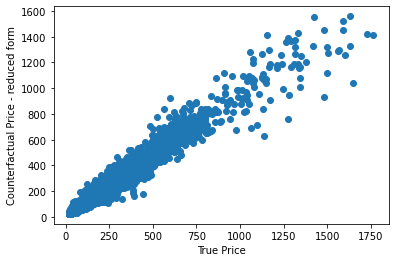

In [975]:
plt.scatter(df["ADR"],df["price_without_review"])
plt.xlabel("True Price")
plt.ylabel("Counterfactual Price - reduced form")

In [976]:
df["price_without_review"].describe()

count    73518.000000
mean       123.688993
std         86.200556
min         23.167017
25%         73.857393
50%        106.983400
75%        149.753473
max       1559.417913
Name: price_without_review, dtype: float64

In [977]:
df["ADR"].describe()

count    73518.000000
mean       124.742188
std         88.614213
min         19.046893
25%         72.827336
50%        108.106922
75%        150.928150
max       1763.682008
Name: ADR, dtype: float64

## compare real price vs. counterfactual price

In [1044]:
df = pd.read_csv(\
    r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/data/welfare_data_reduced_form_price.csv")

In [1045]:
(df["ADR"]-df["price_without_review"]).describe()

count    73518.000000
mean         1.053195
std         16.439219
min       -329.311527
25%         -5.514378
50%          0.440926
75%          7.014855
max        603.706591
dtype: float64

In [1046]:
price_cf = df.groupby(["Market","Class Group"])["price_without_review"].mean().reset_index()

In [1047]:
price_real = df.groupby(["Market","Class Group"])["ADR"].mean().reset_index()

In [1048]:
price = price_real.merge(price_cf, on=["Market","Class Group"]).rename(columns={"price_without_review":"ADR_without_review"})

In [1051]:
df["delta_cf"] = df["delta"] - rating_param*(df["Rating"] - df["exante_rating"])-alpha*(df["ADR"]-df["price_without_review"])
df["exp_delta_cf_over_1-sigma"] = np.exp(df["delta_cf"]/(1-sigma))


#calculate counterfactual market share

l=[]
for i in (0,1,2):
    
    data = df[df["Market"]==df["Market"].unique()[i]]
    D_g = data.groupby(["month","year","Class Group"])["exp_delta_cf_over_1-sigma"].sum().reset_index().rename(columns={"exp_delta_cf_over_1-sigma":"D_g_cf"})
    D_g["D_g_1-sigma_cf"] = D_g["D_g_cf"]**(1-sigma)
    D_g["D_g_sigma_cf"] = D_g["D_g_cf"]**(sigma)
    D_g_sum = D_g.groupby(["month","year"])["D_g_1-sigma_cf"].sum().reset_index().rename(columns={"D_g_1-sigma_cf":"D_g_sum_cf"})
    df_temp = data.merge(D_g, on=["month","year","Class Group"], how="left").\
         merge(D_g_sum, on=["month","year"], how="left")
    df_temp["market_share_cf"] = df_temp["exp_delta_cf_over_1-sigma"]/(df_temp["D_g_sigma_cf"]*(df_temp["D_g_sum_cf"]+1))
    l.append(df_temp)

df_data = pd.concat(l,axis=0) 


l=[]
for i in (0,1,2):
    
    data = df_data[df_data["Market"]==df["Market"].unique()[i]]
    D_g = data.groupby(["month","year","Class Group"])["exp_delta_over_1-sigma"].sum().reset_index().rename(columns={"exp_delta_over_1-sigma":"D_g"})
    D_g["D_g_1-sigma"] = D_g["D_g"]**(1-sigma)
    D_g["D_g_sigma"] = D_g["D_g"]**(sigma)
    D_g_sum = D_g.groupby(["month","year"])["D_g_1-sigma"].sum().reset_index().rename(columns={"D_g_1-sigma":"D_g_sum"})
    df_temp = data.merge(D_g, on=["month","year","Class Group"], how="left").\
         merge(D_g_sum, on=["month","year"], how="left")

    l.append(df_temp)

df_data = pd.concat(l,axis=0) 


In [1052]:
df_data = df_data.merge(market_size, on="Market",how="left")
df_data["Demand_cf"] = df_data["market_share_cf"]*df_data["market_size"]
df_data = df_data.rename(columns={"market_share_cf":"market_share_cf_unconstrained"})

### Refit counterfactual market share

In [1053]:
df_data["Demand_cf"] = df_data[['Demand_cf','Supply']].min(axis=1)
df_data["market_share_cf"] = df_data["Demand_cf"]/df_data["market_size"]

Text(0.5, 1.0, 'Constrained vs. Un-constrained Market Share')

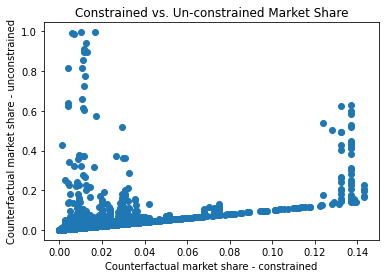

In [1060]:
plt.scatter(df_data["market_share_cf"],df_data["market_share_cf_unconstrained"])
plt.xlabel("Counterfactual market share - constrained")
plt.ylabel("Counterfactual market share - unconstrained")
plt.title("Constrained vs. Un-constrained Market Share")

### Refit counterfactual delta

In [1031]:
# calculate counterfactual within-group market share

l=[]
for i in (0,1,2):
    
    data = df_data[df_data["Market"]==df_data["Market"].unique()[i]]
    
    test_1 = data.groupby(["month","year"])["Demand_cf"].sum().reset_index().rename(columns={"Demand_cf":"Market Monthly Demand_cf"})
    test_2 = data.groupby(["month","year","Class Group"])["Demand_cf"].sum().reset_index().rename(columns={"Demand_cf":"Group Monthly Demand_cf"})
    
    test = test_2.merge(test_1, on=["month","year"], how="left")
    
    temp = data.merge(test, on=["year","month","Class Group"], how="left")
    temp["group_share_cf"] = temp["Demand_cf"]/temp["Group Monthly Demand_cf"]
    temp["s_0_cf"] = 1- temp["Market Monthly Demand_cf"]/temp["market_size"]
    

    l.append(temp)

df = pd.concat(l,axis=0).fillna(0).reset_index()    


In [1032]:
df = df.drop(['D_g_cf','D_g_1-sigma_cf','D_g_sigma_cf','D_g_sum_cf'],axis=1)

In [1033]:
df["delta_cf"] = np.log(df["market_share_cf"])-np.log(df["s_0_cf"])-sigma*np.log(df["group_share_cf"])
df["exp_delta_cf_over_1-sigma"] = np.exp(df["delta_cf"]/(1-sigma))


#calculate counterfactual market share

l=[]
for i in (0,1,2):
    
    data = df[df["Market"]==df["Market"].unique()[i]]
    D_g = data.groupby(["month","year","Class Group"])["exp_delta_cf_over_1-sigma"].sum().reset_index().rename(columns={"exp_delta_cf_over_1-sigma":"D_g_cf"})
    D_g["D_g_1-sigma_cf"] = D_g["D_g_cf"]**(1-sigma)
    D_g["D_g_sigma_cf"] = D_g["D_g_cf"]**(sigma)
    D_g_sum = D_g.groupby(["month","year"])["D_g_1-sigma_cf"].sum().reset_index().rename(columns={"D_g_1-sigma_cf":"D_g_sum_cf"})
    df_temp = data.merge(D_g, on=["month","year","Class Group"], how="left").\
         merge(D_g_sum, on=["month","year"], how="left")
    l.append(df_temp)

df_data = pd.concat(l,axis=0) 


In [1034]:
# calculate walfare
df_data["market_share_cf_delta_diff"] = df_data["market_share_cf"]*(rating_param*(df_data["Rating"] - df_data["exante_rating"])+alpha*(df_data["ADR"]-df_data["price_without_review"]))
#df_data["market_share_cf_delta_diff"] = df_data["market_share_cf"]*(df_data["quality"] - df_data["quality_without_review_fixed_price"])


l=[]
for i in (0,1,2):
    
    data = df_data[df_data["Market"]==df["Market"].unique()[i]]
    diff = data.groupby(["month","year"])["market_share_cf_delta_diff"].sum().reset_index().rename(columns={"market_share_cf_delta_diff":"diff_term"})
    temp = data.merge(diff,on=["month","year"], how="left")
    l.append(temp)
    
df_3 = pd.concat(l,axis=0)
    

In [1035]:
df_cs = df_3[["Market","year","month","Market Monthly Supply","D_g_sum","D_g_sum_cf","diff_term"]].drop_duplicates()

df_cs["cs"] = (np.log(1+df_cs["D_g_sum"]) - np.log(1+df_cs["D_g_sum_cf"])-df_cs["diff_term"])/alpha

In [1036]:
market_size = df_cs.groupby("Market")["Market Monthly Supply"].max().reset_index().rename(columns={"Market Monthly Supply":"market_size"})
max_cs = df_cs.groupby("Market")["cs"].max().reset_index().rename(columns={"cs":"max_cs"})
min_cs = df_cs.groupby("Market")["cs"].min().reset_index().rename(columns={"cs":"min_cs"})
mean_cs = df_cs.groupby("Market")["cs"].mean().reset_index().rename(columns={"cs":"mean_cs"})

cs = market_size.merge(max_cs, on="Market").merge(min_cs, on="Market").merge(mean_cs,on="Market")
cs["total_cs"] = cs["market_size"]*cs["mean_cs"]
cs

,Market,market_size,max_cs,min_cs,mean_cs,total_cs
0,"Chicago, IL",1210161.0,-0.736853,-63.337502,-10.944935,-1.324513e+07
1,"Houston, TX",1436018.0,-0.348396,-45.552293,-3.999360,-5.743153e+06
2,"Miami/Hialeah, FL",325922.6,-0.409539,-118.124400,-23.335251,-7.605486e+06


In [1039]:
df_3["market_share_percent_diff"] = (df_3["market_share_cf"] - df_3["market_share"])/df_3["market_share"]
df_3.groupby(["Operation"])["market_share_percent_diff"].describe().reset_index()

,Operation,count,mean,std,min,25%,50%,75%,max
0,1,23624.0,-0.052123,0.299527,-0.999999,-0.213350,-0.041102,0.108720,6.036252
1,2,39990.0,-0.037016,0.304679,-0.999154,-0.230517,-0.049853,0.136260,4.317324
2,3,9904.0,-0.146156,0.516816,-1.000000,-0.463609,-0.177234,0.132188,8.185185


In [1041]:
df_3["Revenue_cf"] = df_3["market_share_cf"]*df_3["market_size"]*df_3["price_without_review"]
df_3["revenue_percent_diff"] = (df_3["Revenue_cf"] - df_3["Revenue"])/df_3["Revenue"]
df_3.groupby("Operation")["revenue_percent_diff"].median().reset_index()

,Operation,revenue_percent_diff
0,1,-0.033590
1,2,-0.052114
2,3,-0.161139


In [1042]:
df_3["rating_int"] = df_3["accum_rating"].round(0)
df_3.groupby(["rating_int"])["market_share_percent_diff"].mean()

rating_int
0.0   -0.016938
1.0    0.052161
2.0    0.010917
3.0   -0.049015
4.0   -0.086339
5.0   -0.111864
Name: market_share_percent_diff, dtype: float64

In [1043]:
df_3.groupby(["rating_int"])["revenue_percent_diff"].mean()

rating_int
0.0   -0.039104
1.0    0.056196
2.0   -0.020128
3.0   -0.072740
4.0   -0.114522
5.0   -0.140224
Name: revenue_percent_diff, dtype: float64